In [140]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [141]:
# Carga de todos los csv en la carpeta 'mediciones'
files = os.listdir('mediciones')

# Lista de dataframes
dfs = [pd.read_csv('mediciones/' + file) for file in files]

# Nombre de las futuras columnas
columns = [f.replace(".csv", "") for f in files ]


In [142]:
# Verifico que todos los dataframes tengan la misma columna de tiempo
time_cols = [df['time'].tolist() for df in dfs]
for i, time_col in enumerate(time_cols):
    if time_col != time_cols[0]:
        print(f'Dataframe {i} es diferente!')
        break
    else:
        print(f'Df {i} vs 0: Todas las filas son iguales')

Df 0 vs 0: Todas las filas son iguales
Df 1 vs 0: Todas las filas son iguales
Df 2 vs 0: Todas las filas son iguales
Df 3 vs 0: Todas las filas son iguales
Df 4 vs 0: Todas las filas son iguales
Df 5 vs 0: Todas las filas son iguales
Df 6 vs 0: Todas las filas son iguales
Df 7 vs 0: Todas las filas son iguales


In [143]:
# Concatenate all dataframes with first colum 'time' and '(V)' columns
df = pd.concat([df['(V)'] for df in dfs], axis=1)
df.columns = columns
df['time'] = time_cols[0]

# Make 'time' column the index
df.set_index('time', inplace=True)

# Reordeno columnas usando parte numerica del nombre
columns = sorted(columns, key=lambda x: int(x[:-2]))
df = df[columns]

df.head()

181mm     261mm     552mm     644mm     743mm     839mm     927mm  \
time                                                                          
0.000  0.355050  0.347517  0.357561  0.360072  0.360072  0.360072  0.357561   
0.005  0.355050  0.355050  0.365094  0.357561  0.367605  0.360072  0.357561   
0.010  0.355050  0.347517  0.355050  0.367605  0.365094  0.362583  0.357561   
0.015  0.357561  0.339984  0.357561  0.362583  0.357561  0.357561  0.350028   
0.020  0.347517  0.355050  0.357561  0.362583  0.355050  0.360072  0.365094   

         1042mm  
time             
0.000  0.355050  
0.005  0.357561  
0.010  0.357561  
0.015  0.357561  
0.020  0.357561

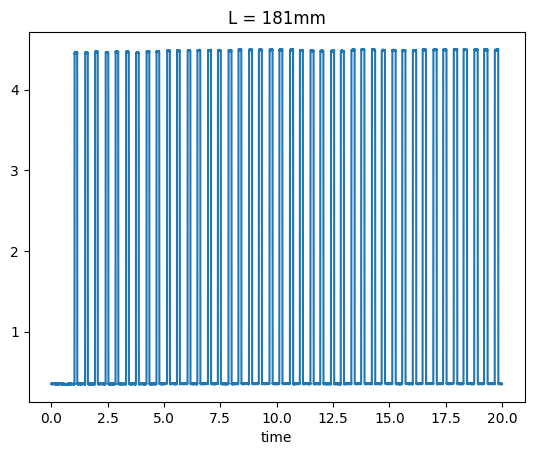

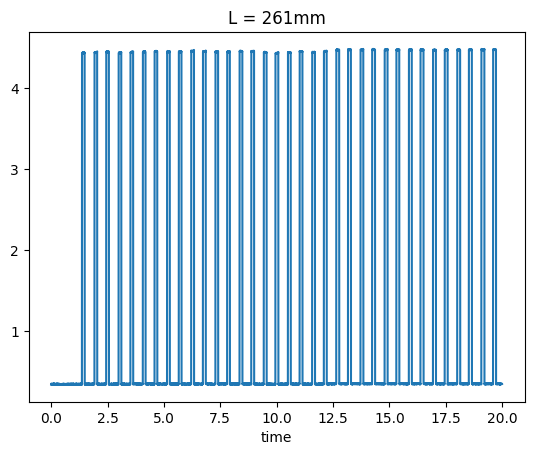

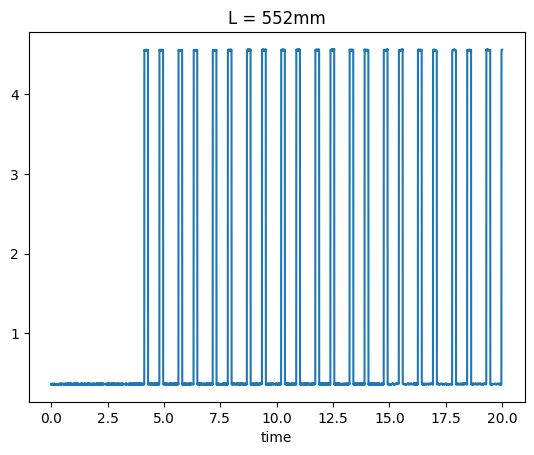

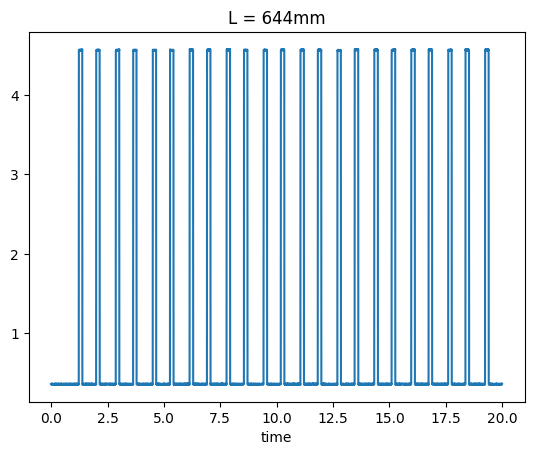

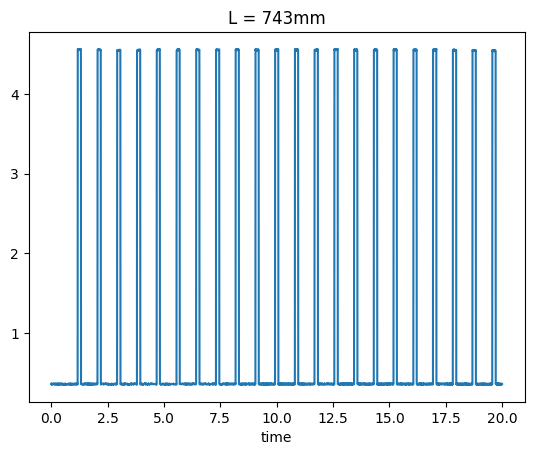

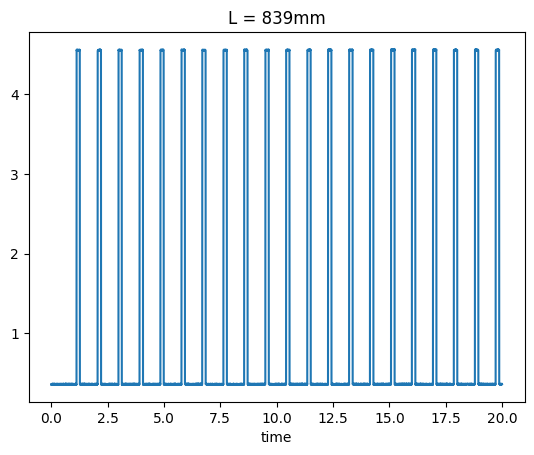

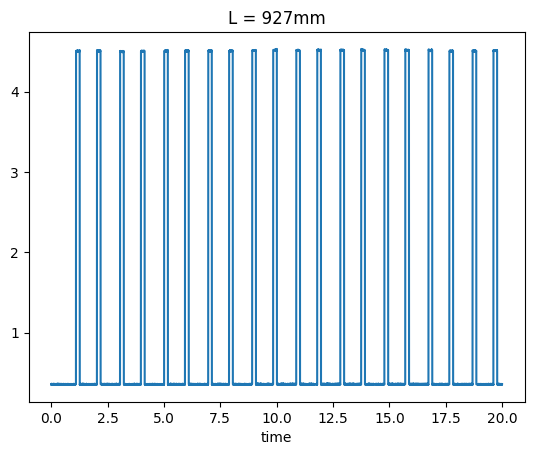

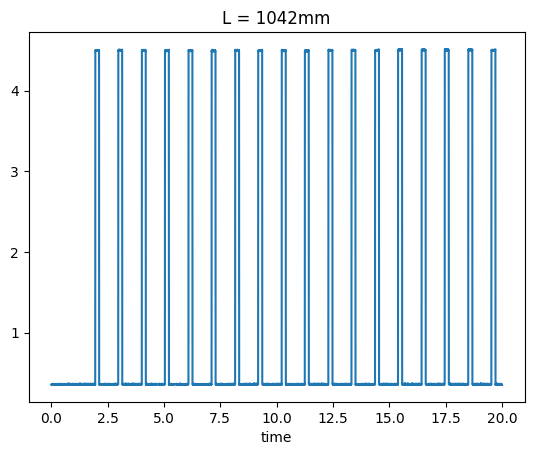

In [144]:
for c in columns:
    df[c].plot()
    plt.title(f"L = {c}")
    plt.show()

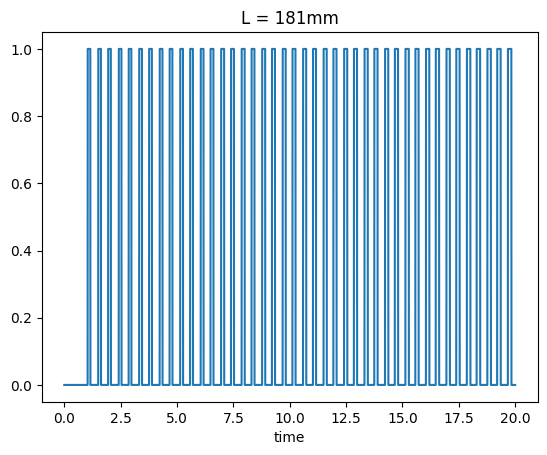

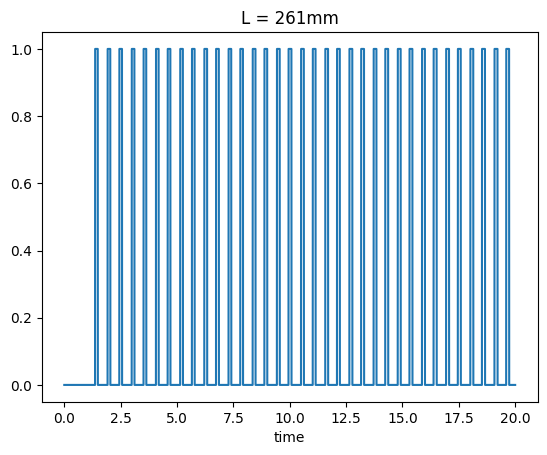

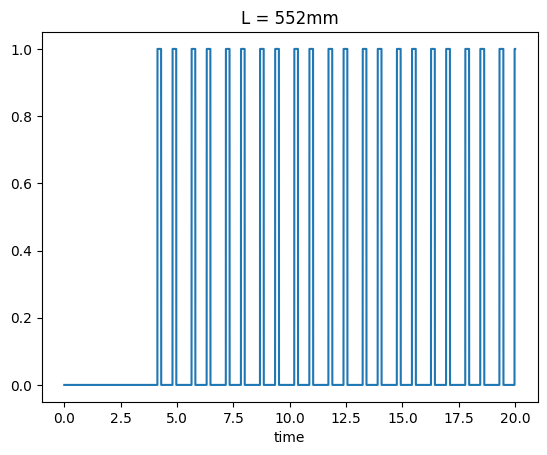

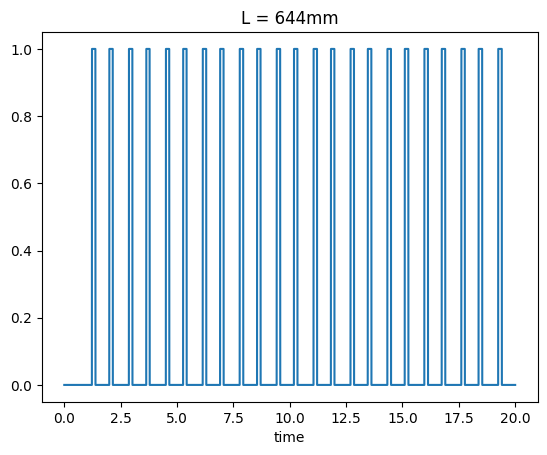

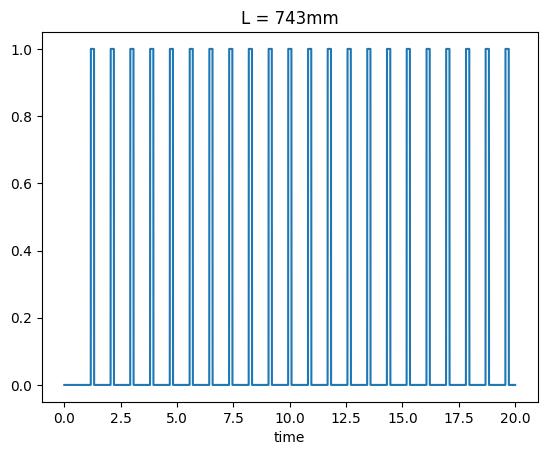

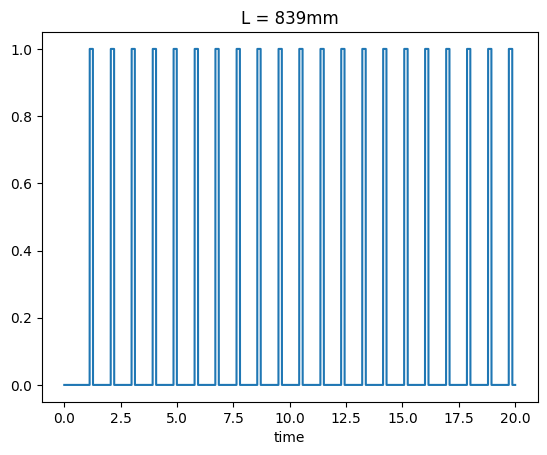

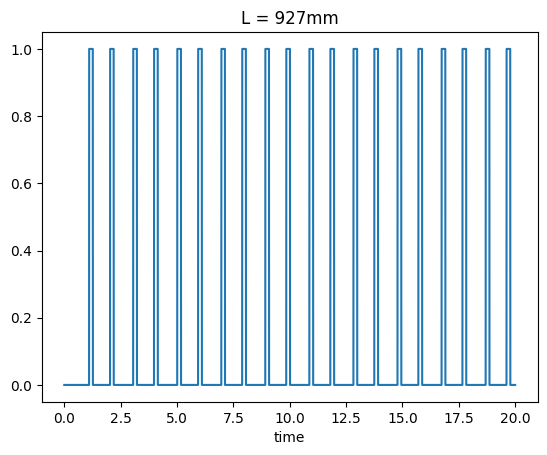

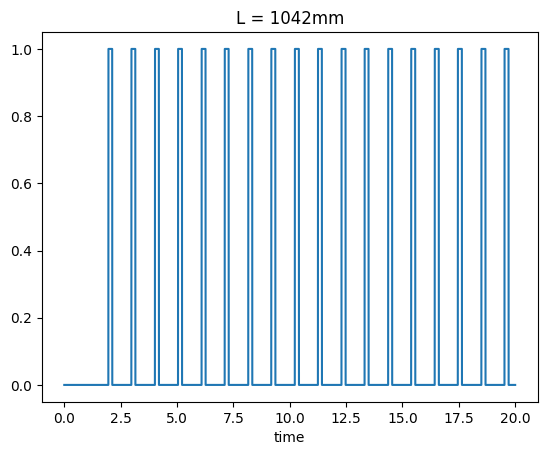

In [145]:
# Duplicate and digitalize each column: if greater than 3 set it to 1, else 0
df_digital = df.apply(lambda x: x > 3).astype(int)

# Plot digitalized signals
for c in columns:
    df_digital[c].plot()
    plt.title(f"L = {c}")
    plt.show()


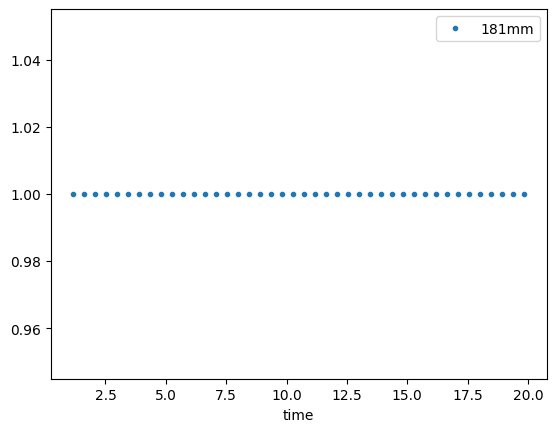

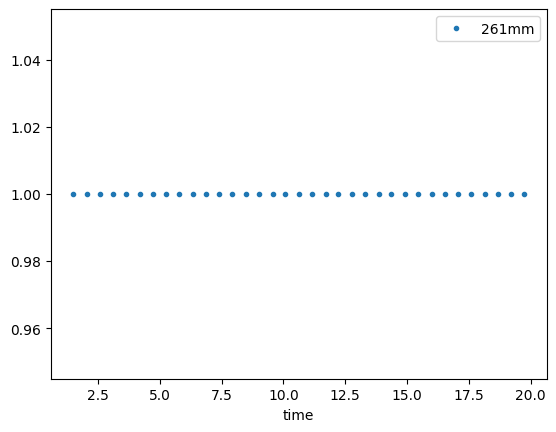

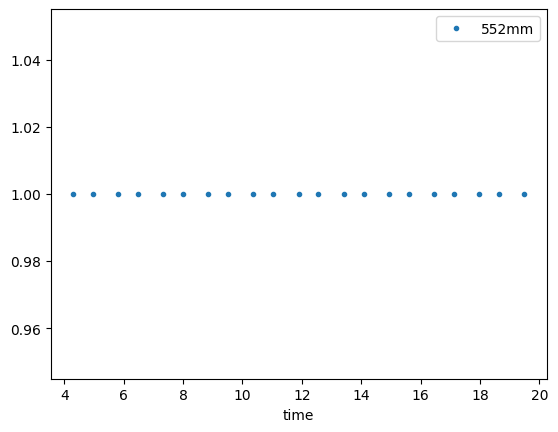

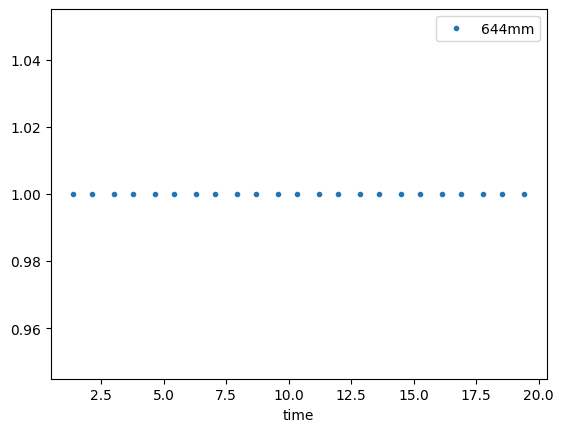

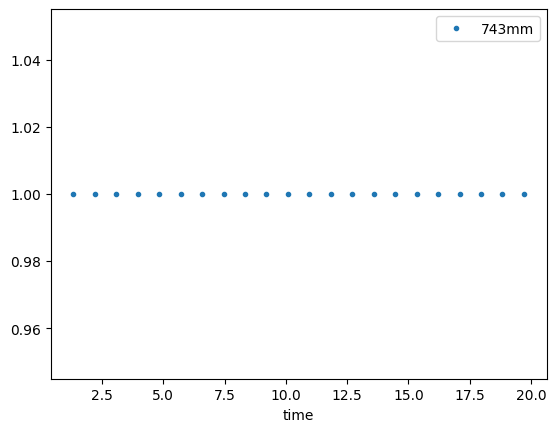

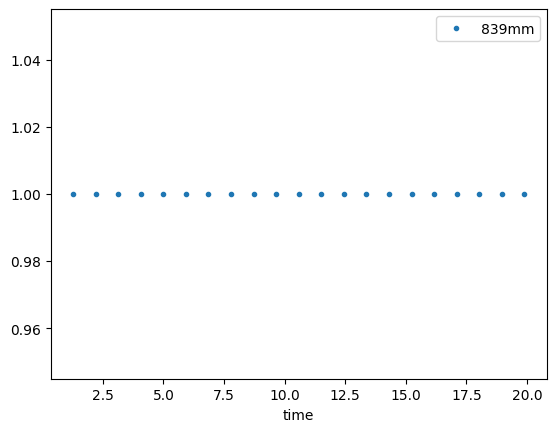

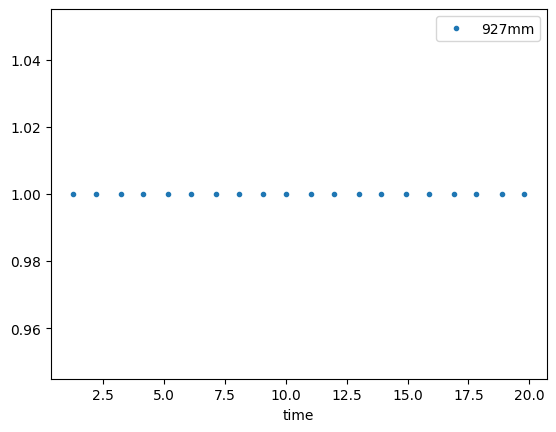

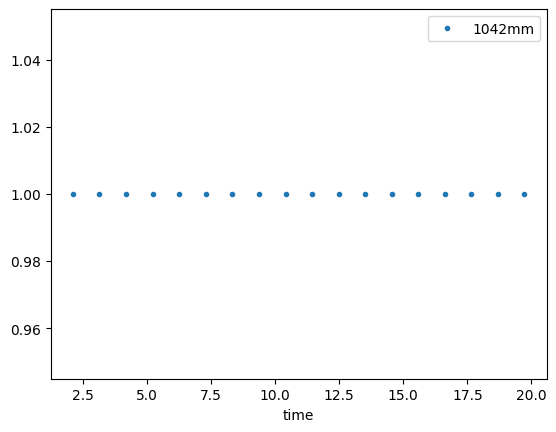

In [146]:
# Creo lista de dataframes solo con los comienzos de cada pulso
starts_dfs = [df_digital[c].diff().apply(lambda x: x == -1).astype(int) for c in columns]

# Borro filas con zeros de cada df
starts_dfs = [df[df == 1].dropna() for df in starts_dfs]

for s in starts_dfs:
    s.plot(style='.')
    plt.legend()
    plt.show()

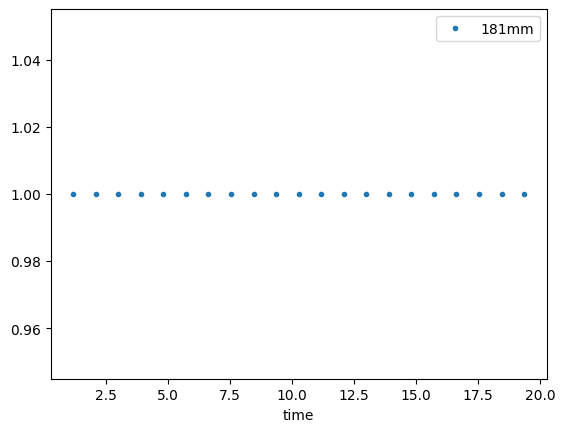

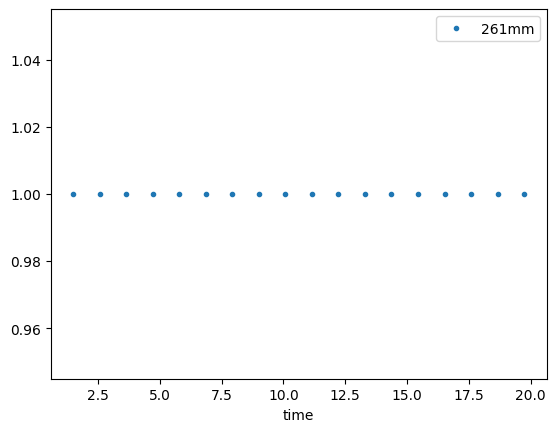

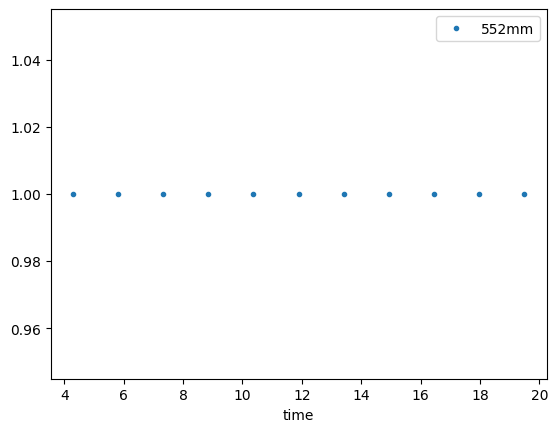

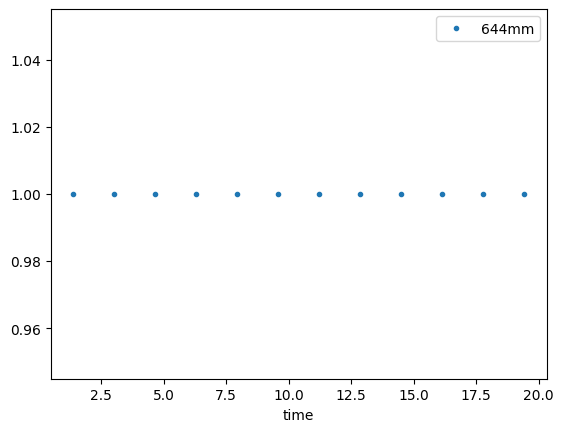

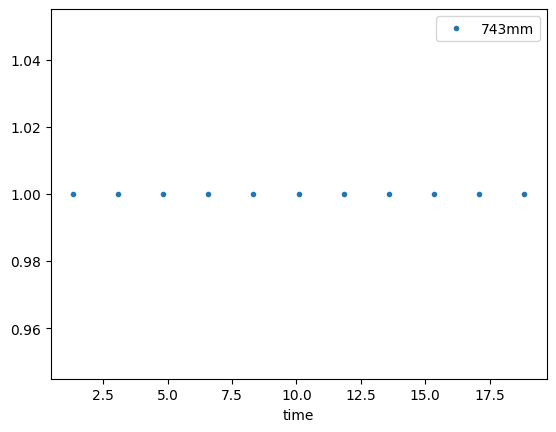

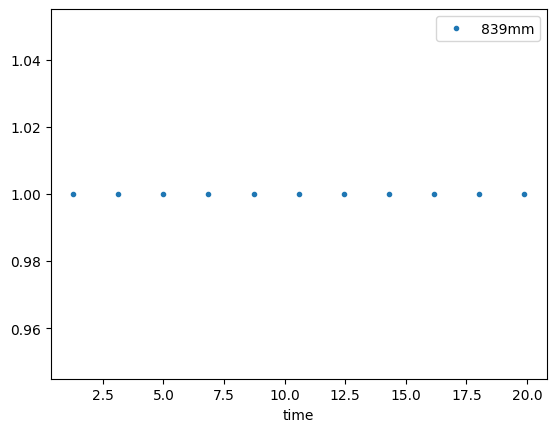

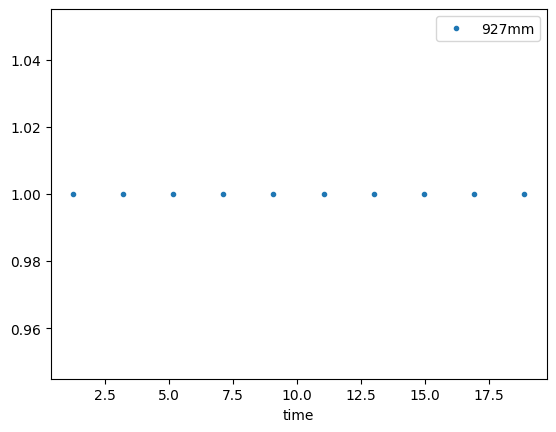

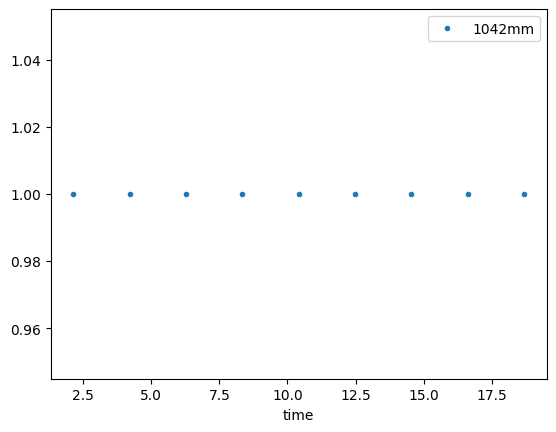

In [189]:
# Separo filas pares e impares
even_period_dfs = [df.iloc[::2] for df in starts_dfs]
odd_period_dfs = [df.iloc[1::2] for df in starts_dfs]


for p in even_period_dfs:
    p.plot(style='.')
    plt.legend()
    plt.show()

In [190]:
# Convierto index como columna de tiempo
even_period_dfs = [df.reset_index(inplace=False) for df in even_period_dfs]
odd_period_dfs = [df.reset_index(inplace=False) for df in odd_period_dfs]


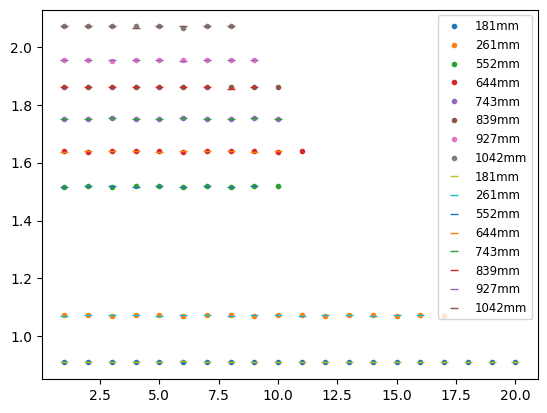

In [191]:
for i in range(len(even_period_dfs)):
    even_period_dfs[i]['time'].diff().plot(style='.')

for i in range(len(odd_period_dfs)):
    odd_period_dfs[i]['time'].diff().plot(style='_')

plt.legend(columns+columns, fontsize='small')
plt.show()

In [197]:
def get_values(even_df, odd_df):
    return list(even_df['time'].diff().dropna().values) + list(odd_df['time'].diff().dropna().values)

In [200]:
duraciones = [get_values(even_df, odd_df) for even_df, odd_df in zip(even_period_dfs, odd_period_dfs)]

period_means = [np.mean(d) for d in duraciones]
period_stds = [np.std(d) for d in duraciones]
period_amounts = [len(d) for d in duraciones]


errores = []
longitudes = []
for c, m, s, a in zip(columns, period_means, period_stds, period_amounts):
    print(f"L = {c} - {a} mediciones")
    print(f"Periodo medio:   {m:.6f}")
    print(f"Desvio estandar: {s:.6f}")
    L = float(c.replace("mm", "")) / 1000
    T = 2 * np.pi * np.sqrt(L / 9.79687)
    # Local gravity https://www.sensorsone.com/local-gravity-calculator/#local-gravity
    print(f"Periodo esperado: {T:.6f}")
    print(f"Error: {abs(T - m):.6f}")
    print(f"Error: {abs(T - m) / T * 100:.6f}%")
    errores.append(abs(T - m))
    longitudes.append(L)
    print("-"*50)


L = 181mm - 40 mediciones
Periodo medio:   0.910125
Desvio estandar: 0.000781
Periodo esperado: 0.854035
Error: 0.056090
Error: 6.567692%
--------------------------------------------------
L = 261mm - 33 mediciones
Periodo medio:   1.073333
Desvio estandar: 0.002357
Periodo esperado: 1.025549
Error: 0.047784
Error: 4.659382%
--------------------------------------------------
L = 552mm - 19 mediciones
Periodo medio:   1.517895
Desvio estandar: 0.002469
Periodo esperado: 1.491440
Error: 0.026455
Error: 1.773784%
--------------------------------------------------
L = 644mm - 21 mediciones
Periodo medio:   1.638571
Desvio estandar: 0.002259
Periodo esperado: 1.610939
Error: 0.027632
Error: 1.715292%
--------------------------------------------------
L = 743mm - 20 mediciones
Periodo medio:   1.751500
Desvio estandar: 0.002291
Periodo esperado: 1.730337
Error: 0.021163
Error: 1.223078%
--------------------------------------------------
L = 839mm - 19 mediciones
Periodo medio:   1.859737
Des

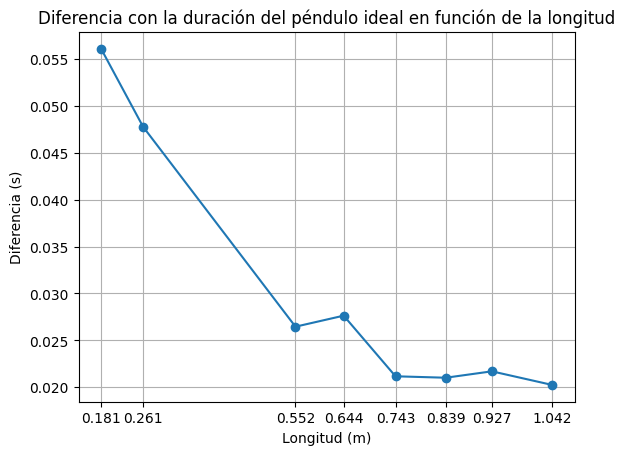

In [223]:
plt.plot(longitudes, errores, '-o')
plt.xlabel("Longitud (m)")
plt.ylabel("Diferencia (s)")
plt.title("Diferencia con la duración del péndulo ideal en función de la longitud")
plt.grid()
# Add vertical line and xtick in x axis at each x point value
plt.xticks(longitudes)

plt.show()